## Video Description POC

In [4]:
from IPython.display import display, Image, Audio

import cv2
import base64
import time
from openai import OpenAI
import os
import requests

In [ ]:
client = OpenAI(api_key='')

In [3]:
video = cv2.VideoCapture("videos/BostonEventsVideo.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

450 frames read.


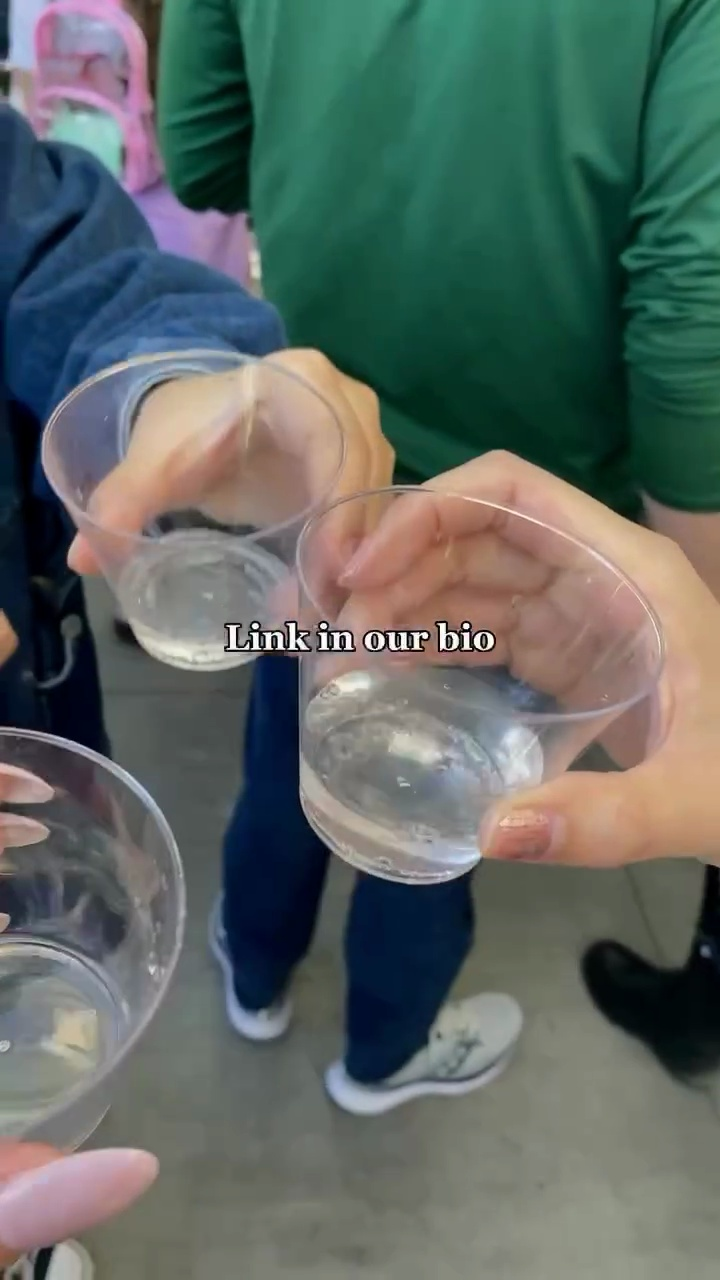

In [5]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [9]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "I am uploading frames extracted from a video. Provide a detailed description of what you see in the video, focusing only on the content. Identify the type of event depicted and include relevant details such as event type, timing, and pricing if they appear in the frames. Ensure the response is purely descriptive without additional interpretation or assumptions.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
params = {
    "model": "gpt-4o",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

The video frames depict an event at a location named "Time Out Market." The event is called "Spring Fizz Fest," scheduled for March 8th. The event seems to involve sampling drinks related to spring and St. Patrick's Day. The attendees are seen both outside and inside, indicating a well-attended gathering. The frames show people sipping drinks and engaging with vendors. Information about a promotion is visible, indicating a "buy 2 get 2 free" offer valid until Friday, using the code "friends." The environment appears lively, with a blend of indoor and outdoor activities.


## Image Description POC

In [8]:
import base64
from openai import OpenAI


# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


# Path to your image
image_path = "images/event_lens_images.jpg"

# Getting the Base64 string
base64_image = encode_image(image_path)

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "You will be provided with an image related to an event. Describe the image concisely, focusing only on event-specific details. If the image includes information such as the event name, timing, date, or price, extract and provide those details. Exclude any unrelated observations or interpretations.",
                },
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
                },
            ],
        }
    ],
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Event Name: For the Love of RNB  \nDate: February 15th  \nTime: 7 PM  \nPrice: $20 online / $25 at the door  \nLocation: Neal Rantoul Vault Theatre (Lynn Arts), 25 Exchange St., Lynn, MA 01901  \nPerformers: Dreion, Ashanti Eva Davenport, Bia Javier, & more  ', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


In [10]:
print(response.choices[0].message.content)

Event Name: For the Love of RNB  
Date: February 15th  
Time: 7 PM  
Price: $20 online / $25 at the door  
Location: Neal Rantoul Vault Theatre (Lynn Arts), 25 Exchange St., Lynn, MA 01901  
Performers: Dreion, Ashanti Eva Davenport, Bia Javier, & more  
